# A first look at CMEMS SLTAC global gridded product

In [6]:
%matplotlib inline
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.rcParams["figure.figsize"] = (16,10)

In [7]:
# we already downloaded files as part of a previous tutorial
filename = "/Users/pierre/Documents/Presentations/201706_CMEMSArctic/data_tmp/dt_global_allsat_phy_l4_20160925_20170209.nc"
nc = Dataset(filename, 'r')
for variable in nc.variables:
    print(variable)

crs
time
latitude
lat_bnds
longitude
lon_bnds
nv
sla
err
ugosa
vgosa
adt
ugos
vgos


In [8]:
# read the latitudes and longitudes
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
print(np.shape(lat))
print(np.shape(lon))

(720,)
(1440,)


In [9]:
# read sea level anomaly data
# first dimension (length=1) is time, but we don't care about time here...
sla = nc.variables['sla'][0,:,:]
print(np.shape(sla))

(720, 1440)


In [10]:
# coordinates to mesh
lon,lat = np.meshgrid(lon,lat)


/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


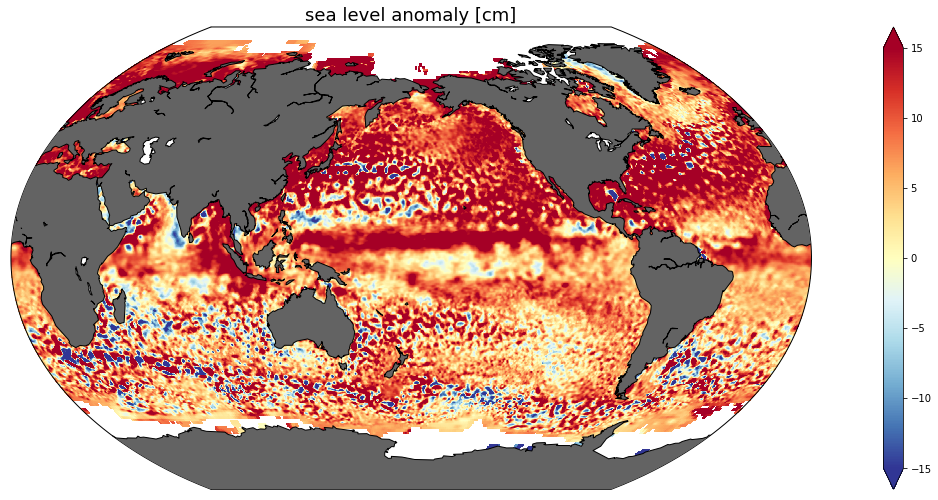

In [11]:
# set up a map and plot the data
m = Basemap(projection='kav7',lon_0=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
# actually plot the data
colormesh = m.pcolormesh(x,y,sla*100.,vmin=-15., vmax=15.,cmap='RdYlBu_r')
cb = m.colorbar(colormesh, pad=1, size='2.5%', extend='both')
plt.title('sea level anomaly [cm]', size=18)

/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


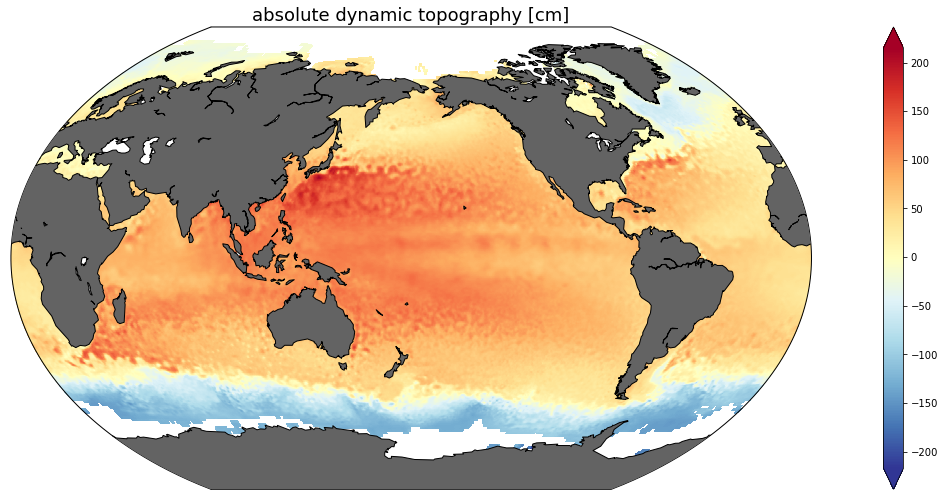

In [12]:
# now we are going to plot adt instead
adt = nc.variables['adt'][0,:,:]

# set up a map and plot the data
m = Basemap(projection='kav7',lon_0=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
# actually plot the data
colormesh = m.pcolormesh(x, y, adt*100., cmap='RdYlBu_r')
cb = m.colorbar(colormesh, pad=1, size='2.5%', extend='both')
plt.title('absolute dynamic topography [cm]', size=18)

/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


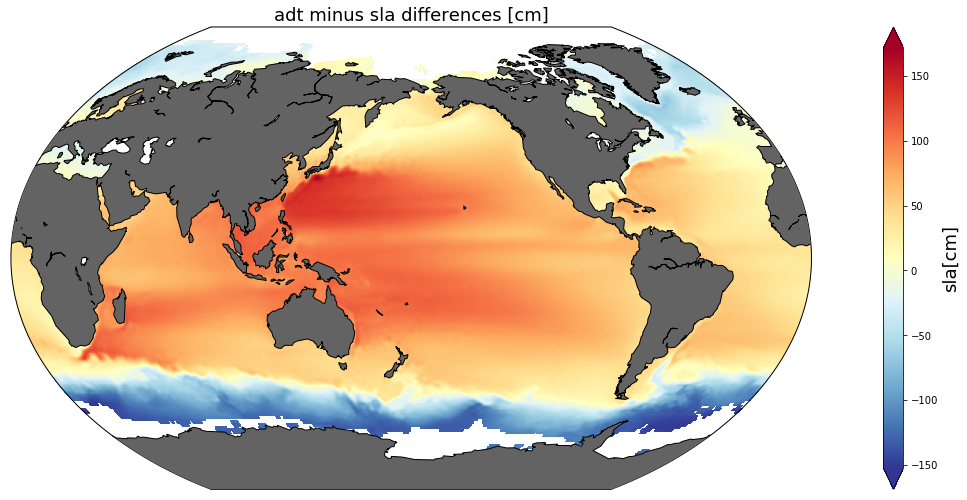

In [13]:
# and the difference between these two variables
diffSlaAdt = adt - sla
# set up a map and plot the data
m = Basemap(projection='kav7',lon_0=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
# actually plot the data
colormesh = m.pcolormesh(x, y, diffSlaAdt*100., cmap='RdYlBu_r')
cb = m.colorbar(colormesh, pad=1, size='2.5%', extend='both')
cb.set_label('sla[cm]', fontsize=18)
plt.title('adt minus sla differences [cm]', size=18);

# and this should look like the mean dynamic topography !

/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/m

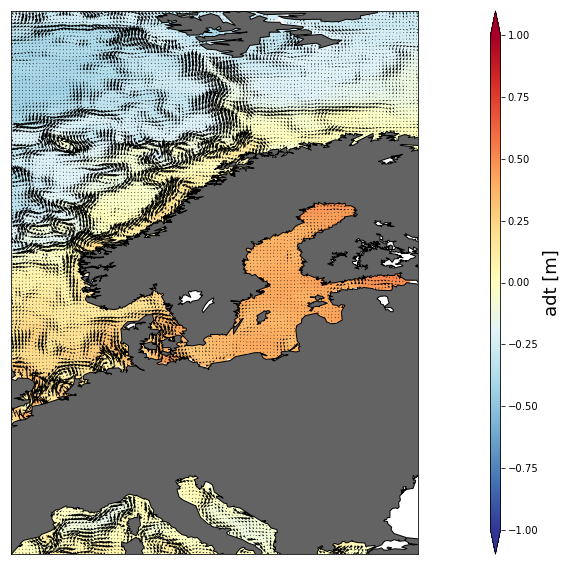

In [14]:
# plotting in a sub region, for example near Norway
m = Basemap(projection='cyl', llcrnrlat=40, urcrnrlat=80, llcrnrlon=0, urcrnrlon=30, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
colormesh = m.pcolormesh(x, y, adt, cmap='RdYlBu_r', vmin=-1., vmax=1., zorder=1)
cb = m.colorbar(colormesh, pad=1, size='2.5%', extend='both')
cb.set_label('adt [m]', fontsize=18)

# overlay geostrophic velocities
u = nc.variables['ugos'][0,:,:]
v = nc.variables['vgos'][0,:,:]
barbs = m.quiver(x, y, u, v, scale=10.)



/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/m

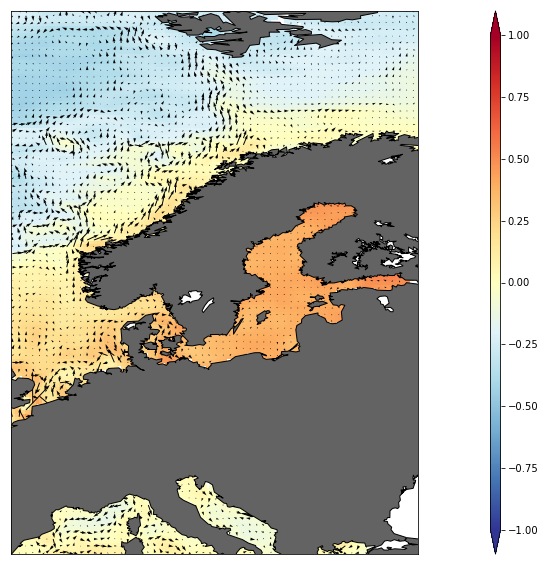

In [15]:
# there is too much info here, so downsample velocities a little bit
m = Basemap(projection='cyl', llcrnrlat=40, urcrnrlat=80, llcrnrlon=0, urcrnrlon=30, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
colormesh = m.pcolormesh(x, y, adt, cmap='RdYlBu_r', vmin=-1., vmax=1., zorder=1)
cb = m.colorbar(colormesh, pad=1, size='2.5%', extend='both')
barbs = m.quiver(x[::2,::2], y[::2,::2], u[::2,::2], v[::2,::2], scale=10.)

In [19]:
# plotting in a sub region, for example near Norway and overlay along-track data

# look the at data
filename = "/Users/pierre/Documents/Presentations/201706_CMEMSArctic/data_tmp/dt_global_alg_phy_vfec_l3_20160925_20170209.nc"
nc = Dataset(filename, 'r')
for variable in nc.variables:
    print(variable)

# load the data
atLat = nc.variables['latitude'][:]
atLon = nc.variables['longitude'][:]
atSla = nc.variables['sla_filtered'][:]

time
longitude
latitude
cycle
track
sla_filtered
adt_filtered


/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pierre/anaconda/envs/notebook/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/pie

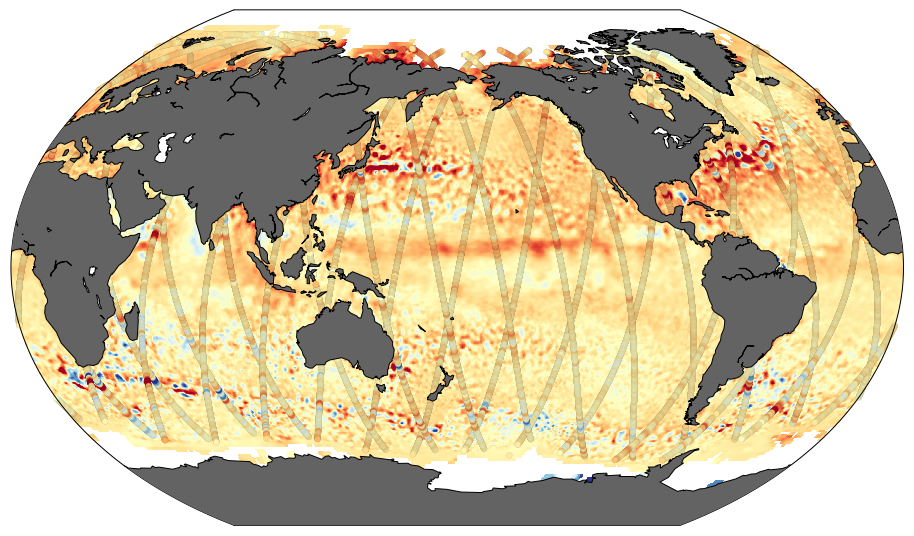

In [31]:
m = Basemap(projection='kav7',lon_0=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
colormesh = m.pcolormesh(x, y, sla, cmap='RdYlBu_r', vmin=-0.5, vmax=0.5, zorder=1)
atX, atY = m(atLon, atLat)
scatter = m.scatter(atX, atY, c=atSla, cmap='RdYlBu_r', vmin=-0.5, vmax=0.5, marker='o', edgecolors='black', linewidth=0.05)